<a href="https://colab.research.google.com/github/DouglasAVS/Teste/blob/main/Over25GLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports
Nesse ciclo o objetivo é entender o problema , entender os dados e rodar o primeiro modelo.

In [1]:
# Bibliotecas default
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Importação de 9 Classificadores
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from xgboost import XGBClassifier 
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , f1_score, precision_score, recall_score
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import  GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Perceptron

#2.0. Loading Data





In [222]:
data1 = pd.read_csv('/content/BRA.csv')
data2 = pd.read_csv('/content/ARG.csv')
data3 = pd.read_csv('/content/IRL.csv')

data = pd.concat([data1,data2,data3])

In [223]:
data.shape

(9497, 19)

In [224]:

data.rename(columns={'FTR': 'Res'}, inplace = True)
data.rename(columns={'HomeTeam': 'Home'}, inplace = True)
data.rename(columns={'AwayTeam': 'Away'}, inplace = True)
data.rename(columns={'FTHG': 'HG'}, inplace = True)
data.rename(columns={'FTAG': 'AG'}, inplace = True)
data.rename(columns={'B365H': 'PH'}, inplace = True)
data.rename(columns={'B365A': 'PA'}, inplace = True)
data.rename(columns={'B365D': 'PD'}, inplace = True)

data.rename(columns={'B365>2.5': 'ODD_Over'}, inplace = True)
data.rename(columns={'B365<2.5': 'ODD_Under'}, inplace = True)

data.rename(columns={'Season': 'Temporada'}, inplace = True)



data.tail(10)

,Country,League,Temporada,Date,Time,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
1862,Ireland,Premier Division,2022,14/03/2022,19:45,Bohemians,Shelbourne,1.0,1.0,D,1.94,3.36,4.61,1.98,3.36,4.69,1.91,3.17,4.41
1863,Ireland,Premier Division,2022,14/03/2022,19:45,Derry City,Drogheda,2.0,0.0,H,1.48,4.41,7.77,1.48,4.50,7.77,1.45,4.27,6.99
1864,Ireland,Premier Division,2022,14/03/2022,19:45,Dundalk,Shamrock Rovers,0.0,0.0,D,4.54,3.71,1.85,4.62,3.71,1.85,4.40,3.51,1.80
1865,Ireland,Premier Division,2022,14/03/2022,19:45,Sligo Rovers,Finn Harps,3.0,1.0,H,2.07,3.16,4.37,2.12,3.30,4.37,2.05,3.14,3.85
1866,Ireland,Premier Division,2022,14/03/2022,19:45,St. Patricks,UC Dublin,2.0,0.0,H,1.44,4.75,7.78,1.47,4.90,8.00,1.42,4.49,7.18
1867,Ireland,Premier Division,2022,18/03/2022,17:00,UC Dublin,Bohemians,1.0,1.0,D,5.54,3.82,1.70,5.75,3.90,1.75,5.10,3.74,1.66
1868,Ireland,Premier Division,2022,18/03/2022,19:45,Derry City,St. Patricks,2.0,1.0,H,2.27,3.21,3.62,2.27,3.36,3.62,2.20,3.17,3.39
1869,Ireland,Premier Division,2022,18/03/2022,19:45,Drogheda,Dundalk,1.0,0.0,H,4.93,3.83,1.77,4.99,3.83,1.77,4.72,3.64,1.72
1870,Ireland,Premier Division,2022,18/03/2022,19:45,Shelbourne,Finn Harps,0.0,3.0,A,2.34,3.06,3.65,2.42,3.28,3.75,2.23,2.98,3.54
1871,Ireland,Premier Division,2022,18/03/2022,20:00,Shamrock Rovers,Sligo Rovers,2.0,2.0,D,1.68,3.73,5.92,1.72,3.80,6.00,1.65,3.55,5.54


#3.0. Data Preparation

Essa seção tem o objetivo de preparar os dados.

In [225]:
# Excluir colunas 

data=data.drop(['League','Time','MaxH','MaxD','MaxA','AvgH','AvgD','AvgA','Country','Date'],1)

data=data.drop(['Res'],1)

#data["Res"] = data["Res"].map({"H":0,"A":1,"D":2})

data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


,Temporada,Home,Away,HG,AG,PH,PD,PA
0,2012,Palmeiras,Portuguesa,1.0,1.0,1.75,3.86,5.25
1,2012,Sport Recife,Flamengo RJ,1.0,1.0,2.83,3.39,2.68
2,2012,Figueirense,Nautico,2.0,1.0,1.60,4.04,6.72
3,2012,Botafogo RJ,Sao Paulo,4.0,2.0,2.49,3.35,3.15
4,2012,Corinthians,Fluminense,0.0,1.0,1.96,3.53,4.41


In [226]:
#Criando a Variavel Alvo

data['Gols_T'] = data['HG'] + data['AG']

conditionlist = [
    (data['Gols_T'] > 2),
     (data['Gols_T'] <=2)]
choicelist = ['Over','Under']
data['Over25'] = np.select(conditionlist, choicelist, default='Under')

data["Over25"] = data["Over25"].map({"Over":1,"Under":0})

data=data.drop(['Gols_T'],1)

data.dropna(inplace = True)


data.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]


,Temporada,Home,Away,HG,AG,PH,PD,PA,Over25
1867,2022,UC Dublin,Bohemians,1.0,1.0,5.54,3.82,1.70,0
1868,2022,Derry City,St. Patricks,2.0,1.0,2.27,3.21,3.62,1
1869,2022,Drogheda,Dundalk,1.0,0.0,4.93,3.83,1.77,0
1870,2022,Shelbourne,Finn Harps,0.0,3.0,2.34,3.06,3.65,1
1871,2022,Shamrock Rovers,Sligo Rovers,2.0,2.0,1.68,3.73,5.92,1


In [227]:
# Criando Colunas 

data['Med_G_C'] = data.groupby('Home')['HG'].transform(lambda x: x.rolling(10, 5).mean())
data['Med_G_F'] = data.groupby('Away')['AG'].transform(lambda x: x.rolling(10, 5).mean())
data['DP_G_C'] = data.groupby('Home')['HG'].transform(lambda x: x.rolling(10, 5).std())
data['DP_G_F'] = data.groupby('Away')['AG'].transform(lambda x: x.rolling(10, 5).std())


data['Casa_CV'] = (data['DP_G_C'] ) / (data['Med_G_C'])  
data['Fora_CV'] =(data['DP_G_F']) / (data['Med_G_F'] )
data['Med_T'] = (data['Med_G_C'] + data['Med_G_F']) / 2
data['Total_CV'] = (data['Casa_CV'] + data['Fora_CV']) /2 

data=data.drop(['HG','AG','DP_G_C','DP_G_F','Med_G_C','Med_G_F','Casa_CV','Fora_CV'],1)

data.Med_T=data.Med_T.round(2)

data.Total_CV=data.Total_CV.round(3)

conditionlist = [
    (data['Total_CV'] <= 0.90),
     (data['Total_CV']> 90)]
choicelist = ['Over','Under']
data['I_Over25'] = np.select(conditionlist, choicelist, default='Under')

data["I_Over25"] = data["I_Over25"].map({"Over":1,"Under":0})

data.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,Temporada,Home,Away,PH,PD,PA,Over25,Med_T,Total_CV,I_Over25
1867,2022,UC Dublin,Bohemians,5.54,3.82,1.70,0,0.95,0.911,0
1868,2022,Derry City,St. Patricks,2.27,3.21,3.62,1,1.40,0.846,1
1869,2022,Drogheda,Dundalk,4.93,3.83,1.77,0,0.95,1.152,0
1870,2022,Shelbourne,Finn Harps,2.34,3.06,3.65,1,0.95,0.946,0
1871,2022,Shamrock Rovers,Sligo Rovers,1.68,3.73,5.92,1,1.70,0.657,1


In [228]:
matches = data.shape[0]

features = data.shape[1] -1 #Retirando a coluna Resultado

Jogos_Over = len(data[data.Over25==1])
Jogos_Under = len(data[data.Over25==0])

val=[Jogos_Over,Jogos_Under]

win_rate = (float(Jogos_Over)/(matches)) *100

print ('Total de jogos: ', matches)
print ('Total de colunas: ', features)
print ('Total de jogos com mais de 2 gols: ', Jogos_Over)
print ('Total de jogos com menos de 2 gols: ', Jogos_Under)
print ('Percentual de jogos com mais de 2 gols: {:.2f}%'.format( win_rate ))

Total de jogos:  9476
Total de colunas:  9
Total de jogos com mais de 2 gols:  4083
Total de jogos com menos de 2 gols:  5393
Percentual de jogos com mais de 2 gols: 43.09%


In [229]:
dataCasa = data.loc[(data['PH'] <= 1.70) ]
dataCasa = dataCasa.loc[(dataCasa['Med_T'] >= 1.25)]


dataCasa = dataCasa.loc[(dataCasa['Total_CV'] <=0.90)]

matches = dataCasa.shape[0]

features = dataCasa.shape[1] -1 #Retirando a coluna Resultado

Jogos_Over = len(dataCasa[dataCasa.Over25==1])
Jogos_Under = len(dataCasa[dataCasa.Over25==0])

val=[Jogos_Over,Jogos_Under]

win_rate = (float(Jogos_Over)/(matches)) *100

print ('Total de jogos: ', matches)
print ('Total de colunas: ', features)
print ('Total de jogos com mais de 2 gols: ', Jogos_Over)
print ('Total de jogos com 2 gols ou menos: ', Jogos_Under)
print ('Percentual de jogos ganhos em casa: {:.2f}%'.format( win_rate ))

Total de jogos:  675
Total de colunas:  9
Total de jogos com mais de 2 gols:  436
Total de jogos com 2 gols ou menos:  239
Percentual de jogos ganhos em casa: 64.59%


In [231]:
dataCasa.tail(10)

,Temporada,Home,Away,PH,PD,PA,Over25,Med_T,Total_CV,I_Over25
1804,2021,Shamrock Rovers,Bohemians,1.65,3.98,5.72,0,1.50,0.721,1
1808,2021,Bohemians,Waterford,1.50,4.98,6.14,1,1.60,0.784,1
1812,2021,Dundalk,Waterford,1.48,4.97,6.48,0,1.35,0.754,1
1813,2021,Shamrock Rovers,Finn Harps,1.34,5.19,10.54,1,1.55,0.613,1
1836,2021,Shamrock Rovers,Drogheda,1.45,5.04,6.92,1,1.30,0.787,1
1842,2022,Shamrock Rovers,UC Dublin,1.18,7.42,19.66,1,1.60,0.757,1
1852,2022,Shamrock Rovers,Drogheda,1.23,6.39,15.63,1,1.40,0.762,1
1861,2022,Shamrock Rovers,Bohemians,1.65,3.93,5.93,0,1.75,0.564,1
1866,2022,St. Patricks,UC Dublin,1.44,4.75,7.78,0,1.25,0.889,1
1871,2022,Shamrock Rovers,Sligo Rovers,1.68,3.73,5.92,1,1.70,0.657,1


In [232]:
data.corr()

,PH,PD,PA,Over25,Med_T,Total_CV,I_Over25
PH,1.000000,0.034059,-0.526862,-0.011679,0.000551,-0.022492,0.013753
PD,0.034059,1.000000,0.767709,0.108758,0.236632,-0.021613,0.029797
PA,-0.526862,0.767709,1.000000,0.074701,0.125322,0.043716,-0.021790
Over25,-0.011679,0.108758,0.074701,1.000000,0.269156,-0.179636,0.145747
Med_T,0.000551,0.236632,0.125322,0.269156,1.000000,-0.590451,0.473917
Total_CV,-0.022492,-0.021613,0.043716,-0.179636,-0.590451,1.000000,-0.746954
I_Over25,0.013753,0.029797,-0.021790,0.145747,0.473917,-0.746954,1.000000


In [208]:
dataunder = data.loc[(data['PH'] >= 2) & (data['PA'] >= 2)]
dataunder = dataunder.loc[(dataunder['Med_T'] <= 1)]


dataunder = dataunder.loc[(dataunder['Total_CV'] > 1)]

matches = dataunder.shape[0]

features = dataunder.shape[1] -1 #Retirando a coluna Resultado

Jogos_Over = len(dataunder[dataunder.Over25==1])
Jogos_Under = len(dataunder[dataunder.Over25==0])

val=[Jogos_Over,Jogos_Under]

win_rate = (float(Jogos_Under)/(matches)) *100

print ('Total de jogos: ', matches)
print ('Total de colunas: ', features)
print ('Total de jogos com mais de 2 gols: ', Jogos_Over)
print ('Total de jogos com 2 gols ou menos: ', Jogos_Under)
print ('Percentual de jogos ganhos em casa: {:.2f}%'.format( win_rate ))

Total de jogos:  975
Total de colunas:  9
Total de jogos com mais de 2 gols:  245
Total de jogos com 2 gols ou menos:  730
Percentual de jogos ganhos em casa: 74.87%


In [ ]:
#mean_df = dataacertosunder['ODD_Under'].mean()
#print(mean_df)

In [209]:
data.dropna(inplace = True)
data.tail()

,Temporada,Home,Away,PH,PD,PA,Over25,Med_T,Total_CV,I_Over25
3820,2022,River Plate,Boca Juniors,1.84,3.43,4.98,0,2.15,0.634,1
3821,2022,Talleres Cordoba,Godoy Cruz,2.43,3.23,3.21,1,1.10,0.881,1
3822,2022,Defensa y Justicia,Arsenal Sarandi,1.63,3.87,6.00,0,1.15,1.136,0
3823,2022,Atl. Tucuman,Central Cordoba,3.26,3.18,2.43,0,1.00,1.138,0
3824,2022,Argentinos Jrs,Velez Sarsfield,2.44,3.02,3.41,0,1.05,1.089,0


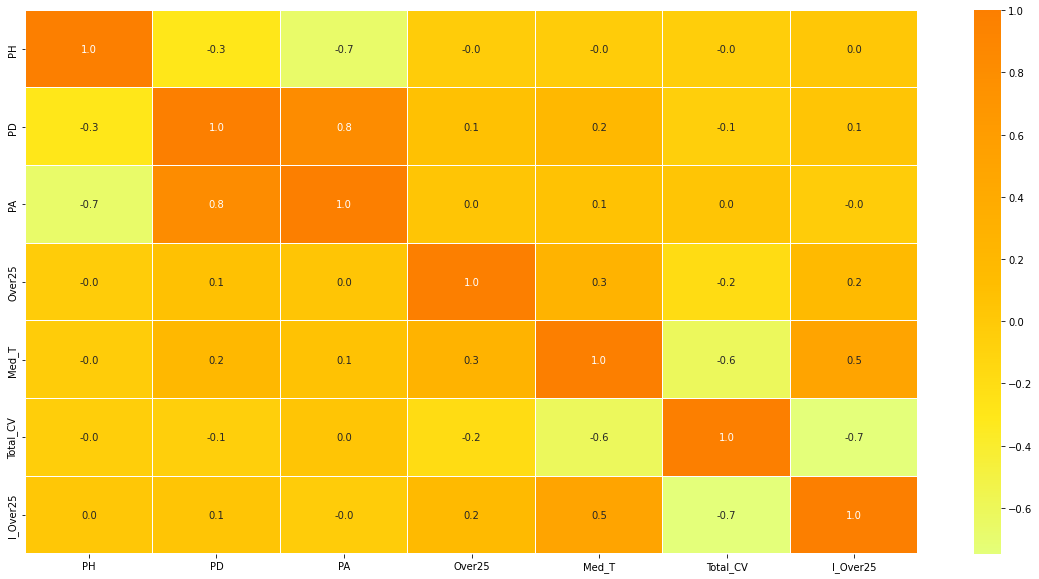

In [210]:
f,ax = plt.subplots(figsize=(20,10))
sns.heatmap(data.corr(), cmap ='Wistia', annot=True, linewidths=.09, fmt= '.1f',ax=ax)
plt.show()

In [233]:
# Take the fields of interest and plug them into variable X
X = data[['I_Over25']]
# Make sure to provide the corresponding truth value
y = data['Over25'].values.tolist()
  
# Split the data into test and training (30% for test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [234]:
features = data.drop(['Med_T','Temporada','Home','Away','Over25','PH','PD','PA','Total_CV'],1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [235]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler().fit(features)
features_scale = scaler.transform(features)
 
print ('Features: ',features_scale.shape)
print (features_scale)

Features:  (9476, 1)
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [1.]]


In [ ]:
#67,39% clf = SVC()
#68,60% clf = LogisticRegression()
#71,83% clf = DecisionTreeClassifier()
#72,32% clf = KNeighborsClassifier()
# Ate agora o melhor #72,53% clf = MLPClassifier()
#73,76% clf = RandomForestClassifier()
#75,19% clf = GradientBoostingClassifier()
#74,55% clf = XGBClassifier()
#75,40% clf = LGBMClassifier()
#clf =Perceptron()

In [236]:
clf = LogisticRegression()
clf


LogisticRegression()

In [237]:
# Train the classifier using the train data
clf = clf.fit(X_train,y_train)

In [238]:
# Validate the classifier
accuracy = clf.score(X_test, y_test)
print('Accuracy: ' + str(accuracy))
# Make a confusion matrix
prediction = clf.predict(X_test)
 
cm = confusion_matrix(prediction, y_test)
cr = classification_report(prediction, y_test)
print(cm)
print(cr)

Accuracy: 0.5881111501934576
[[1056  620]
 [ 551  616]]
              precision    recall  f1-score   support

           0       0.66      0.63      0.64      1676
           1       0.50      0.53      0.51      1167

    accuracy                           0.59      2843
   macro avg       0.58      0.58      0.58      2843
weighted avg       0.59      0.59      0.59      2843



In [239]:
data.shape

(9476, 10)

In [240]:
previsao=features_scale[4000:]
  
Casa_full=data['Home']
Casa=Casa_full[4000:]
 
Visitante_full=data['Away']
Visitante=Visitante_full[4000:]
 
res_full=data["Over25"]
res=res_full[4000:]

var_full=data["I_Over25"]
var=var_full[4000:]

pred=clf.predict(previsao)
 
df=pd.DataFrame({'Mandante':Casa,'Visitante':Visitante,'Prognóstico':pred,'Resultado':res,'Variancia':var})
 
df.head(20)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


,Mandante,Visitante,Prognóstico,Resultado,Variancia
201,Godoy Cruz,Union de Santa Fe,0,1,0
202,San Lorenzo,Belgrano,1,0,1
203,Colon Santa FE,San Martin S.J.,1,0,1
204,Velez Sarsfield,Independiente,1,0,1
205,Tigre,Boca Juniors,0,0,0
206,Quilmes,All Boys,1,1,1
207,Newells Old Boys,Lanus,0,1,0
208,River Plate,Estudiantes L.P.,0,0,0
209,Arsenal Sarandi,Atl. Rafaela,0,0,0
210,Argentinos Jrs,Arsenal Sarandi,1,1,1


print(df.groupby(by=['Fruit','Date']).sum().groupby(level=[0]).cumsum())